In [16]:
import pandas as pd

# Load the CSV file
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
import pandas as pd

# Load the CSV file again
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Resumen estadístico del conjunto de datos
data.describe(include='all')


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [18]:
# Imputar valores nulos
data['Mileage'].fillna(data['Mileage'].mode()[0], inplace=True)
data['Engine'].fillna(data['Engine'].mode()[0], inplace=True)
data['Power'].fillna(data['Power'].mode()[0], inplace=True)
data['Seats'].fillna(data['Seats'].mode()[0], inplace=True)

# Eliminar la columna 'New_Price' debido a la gran cantidad de valores nulos
data.drop(columns=['New_Price'], inplace=True)

# Verificar la imputación de valores nulos
data.isnull().sum()


C:\Users\Ro\AppData\Local\Temp\ipykernel_6768\387817011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mileage'].fillna(data['Mileage'].mode()[0], inplace=True)
C:\Users\Ro\AppData\Local\Temp\ipykernel_6768\387817011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

c:\Users\Ro\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


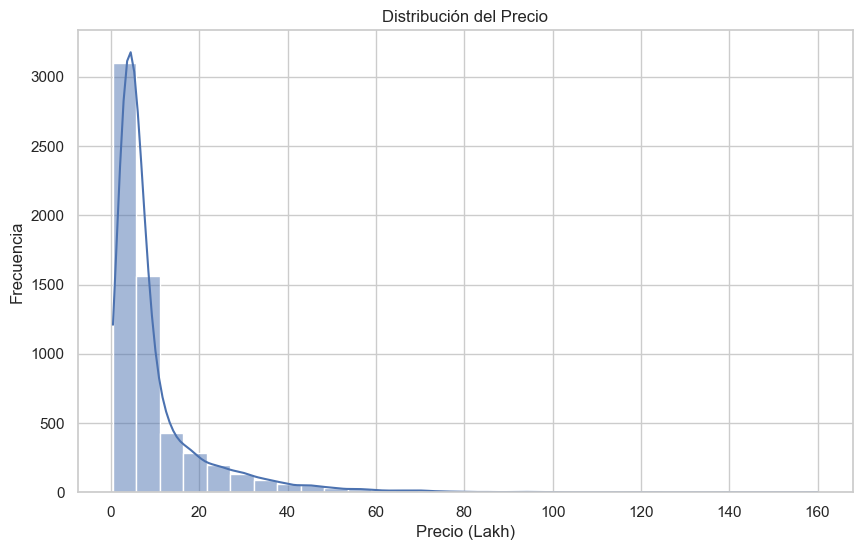

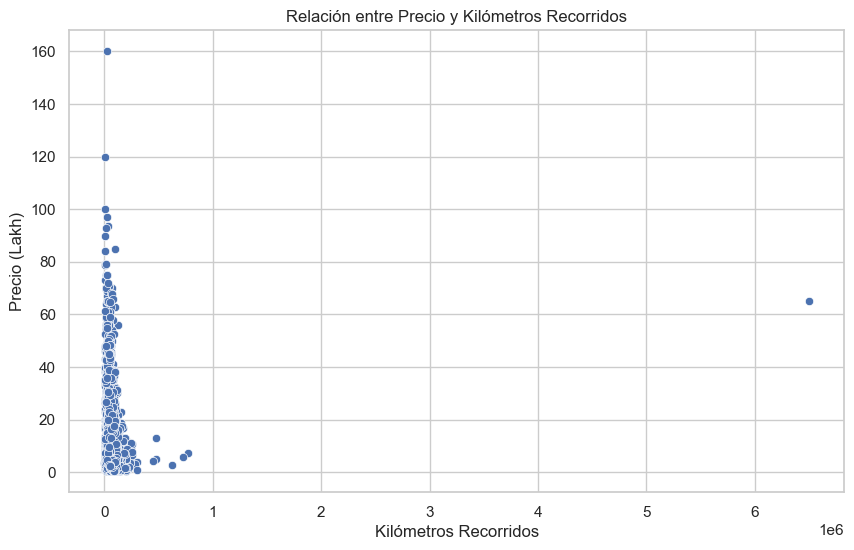

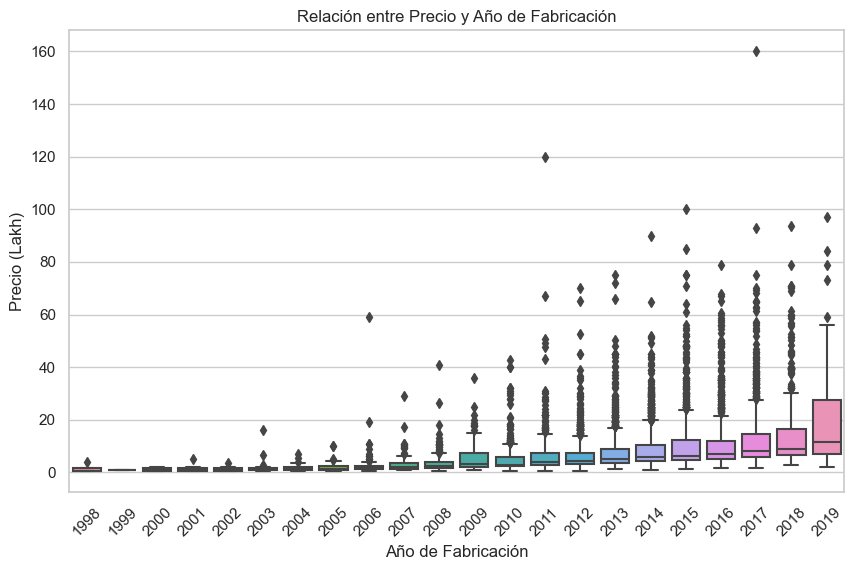

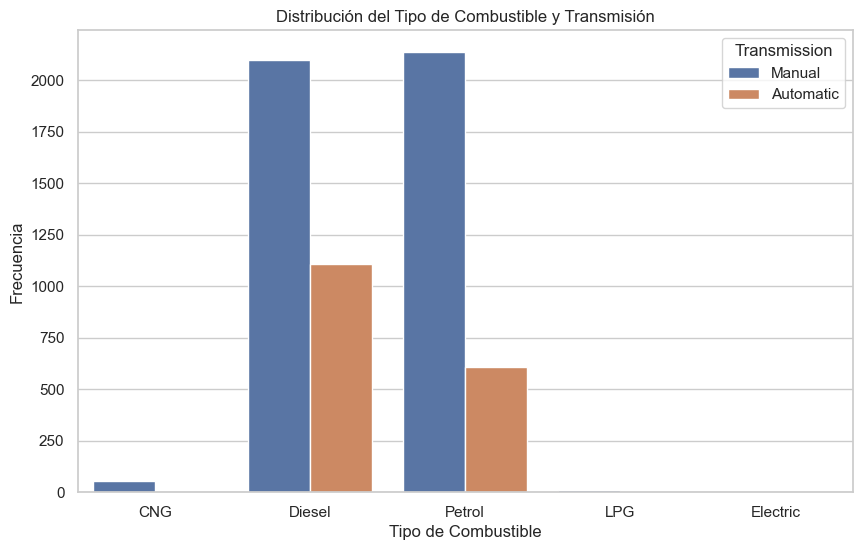

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# 1. Distribución del Precio
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribución del Precio')
plt.xlabel('Precio (Lakh)')
plt.ylabel('Frecuencia')
plt.show()

# 2. Relación entre Precio y Kilómetros Recorridos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Kilometers_Driven'], y=data['Price'])
plt.title('Relación entre Precio y Kilómetros Recorridos')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio (Lakh)')
plt.show()

# 3. Relación entre Precio y Año de Fabricación
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Year'], y=data['Price'])
plt.title('Relación entre Precio y Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio (Lakh)')
plt.xticks(rotation=45)
plt.show()

# 4. Distribución del Tipo de Combustible y Transmisión
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Fuel_Type'], hue=data['Transmission'])
plt.title('Distribución del Tipo de Combustible y Transmisión')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.show()


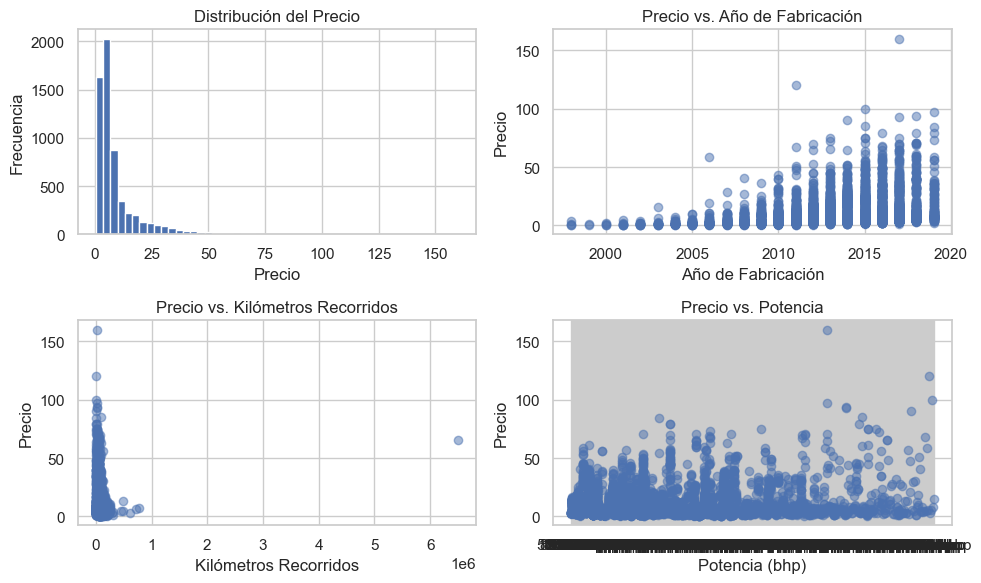

In [20]:
import matplotlib.pyplot as plt

# Configurar el tamaño de las figuras
plt.figure(figsize=(10, 6))

# Distribución del precio
plt.subplot(2, 2, 1)
data['Price'].hist(bins=50)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Relación entre el precio y el año de fabricación
plt.subplot(2, 2, 2)
plt.scatter(data['Year'], data['Price'], alpha=0.5)
plt.title('Precio vs. Año de Fabricación')
plt.xlabel('Año de Fabricación')
plt.ylabel('Precio')

# Relación entre el precio y el kilometraje
plt.subplot(2, 2, 3)
plt.scatter(data['Kilometers_Driven'], data['Price'], alpha=0.5)
plt.title('Precio vs. Kilómetros Recorridos')
plt.xlabel('Kilómetros Recorridos')
plt.ylabel('Precio')

# Relación entre el precio y la potencia
plt.subplot(2, 2, 4)
plt.scatter(data['Power'], data['Price'], alpha=0.5)
plt.title('Precio vs. Potencia')
plt.xlabel('Potencia (bhp)')
plt.ylabel('Precio')

# Mostrar las gráficas
plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Convertir variables categóricas en variables dummy
data_dummies = pd.get_dummies(data, drop_first=True)

# Separar características (X) y la variable objetivo (y)
X = data_dummies.drop(columns='Price')
y = data_dummies['Price']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4815, 2853), (1204, 2853), (4815,), (1204,))

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# Evaluación del modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf
